Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns; sns.set()
import math
%matplotlib inline


In [138]:
def pareto_samples(size, k=5.65, x_m=1):
    """
    Генерирует size выборок, распределённых по Парето
    """
    return sts.pareto.rvs(k, scale=x_m, size=size)

def pareto_dens(X, k=5.65, x_m=1):
    """
    Строит массив значений функции плотности распределения Парето
    """
    return k / X ** (k + 1)

def beta(size, alpha=5, beta=1):
    """
    Генерирует size выборок Бета-распределения
    """
    return sts.beta.rvs(alpha, beta, size=size)

def cen_ten_beta(alpha=5, beta=1):
    """
    Вычисляет среднее и дисперсию бета-распределения с параметрами alpha и beta
    """
    return (alpha/(alpha + beta)), (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))

def beta_dense(X, alpha=5, beta=1):
    """
    Строит массив значений функции плотности Бета-распределения
    """
    import scipy.special as sc
    B = sc.beta(alpha, beta)
    return (X ** (alpha-1)) * ((1 - X) ** (beta-1)) / B

def samples(f, n, val):
    """
    Создаёт val значений n выборок с распределением f
    """
    return [f(n).sum() / float(n) for i in range (val)]
    

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).
В новых matplotlib параметр normed заменяется параметром density

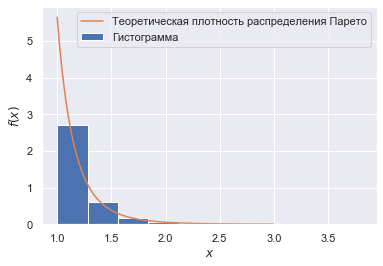

In [103]:
plt.hist(pareto_samples(1000), density=True, label="Гистограмма")
X = np.linspace(1, 3, 100)
plt.plot(X, pareto_dens(X), label="Теоретическая плотность распределения Парето")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

*Парето*

Генерируем несколько выборок для n=2,5,10,15. Параметры для распределения Парето считаем так:
    $$\mathbb{E} f(x) =  \frac{kx_m}{k-1} = \frac{5.65}{4.65} = 1.215$$ 
    $$\mathbb{D} f(x) = (\frac {x_m}{k-1})^2 \frac {k} {k-2} = (\frac{1}{4.65})^2 \frac {5.65} {3.65} = 0.0715$$
    Помним о том, что в функции нормального распределения следует использовать $$\sqrt{ \frac{\mathbb{D}}{n}} = \frac{0.267}{\sqrt{n}}$$ 

Text(0.5, 0, '$x$')

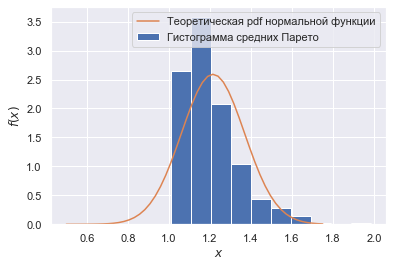

In [129]:
# Для N = 3
plt.hist(samples(pareto_samples, 3, 1000),  density=True, label="Гистограмма средних Парето")
x = np.linspace(0.5,1.75,50)
norm_rv = sts.norm(loc=1.215, scale=0.154)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label="Теоретическая pdf нормальной функции")
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

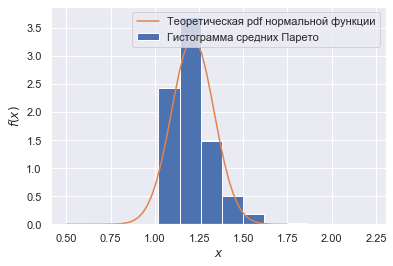

In [130]:
# Для N = 5
plt.hist(samples(pareto_samples, 5, 1000),  density=True, label="Гистограмма средних Парето")
x = np.linspace(0.5,1.75,50)
norm_rv = sts.norm(loc=1.215, scale=0.12)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label="Теоретическая pdf нормальной функции")
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

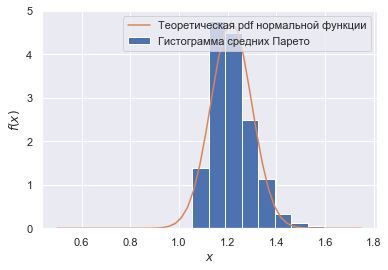

In [131]:
# Для N = 10
plt.hist(samples(pareto_samples, 10, 1000),  density=True, label="Гистограмма средних Парето")
x = np.linspace(0.5,1.75,50)
norm_rv = sts.norm(loc=1.215, scale=0.084)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label="Теоретическая pdf нормальной функции")
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

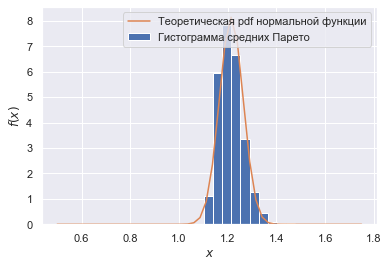

In [132]:
# Для N = 30
plt.hist(samples(pareto_samples, 30, 1000),  density=True, label="Гистограмма средних Парето")
x = np.linspace(0.5,1.75,50)
norm_rv = sts.norm(loc=1.215, scale=0.049)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label="Теоретическая pdf нормальной функции")
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

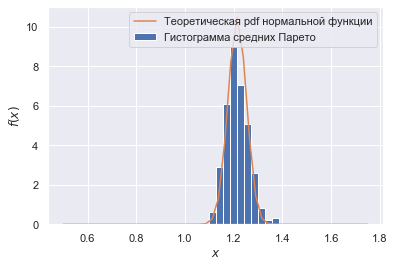

In [134]:
# Для N = 50
plt.hist(samples(pareto_samples, 30, 1000),  density=True, label="Гистограмма средних Парето")
x = np.linspace(0.5,1.75,50)
norm_rv = sts.norm(loc=1.215, scale=0.038)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label="Теоретическая pdf нормальной функции")
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Очевидно можно заметить, что с ростом n функция плотности распределения Парето приближается к плотности нормального распределения. Уже при значениях n от 30 график выглядит практически также, как график плотности нормального распределения. 

Эксперимента для сделаем тоже самое для бета-распределения, но, для начала, вынесем функцию вычисления и рисования в отдельный модуль, чтобы избежать дублирования кода.

In [163]:
def beta_test(n):
    print(f"Количество выборок равно {n}")
    mean, var = cen_ten_beta()
    print(f"Среднее равно {mean:.4f}, дисперсия равна {(var/n):.4f}")
    plt.hist(samples(beta, n, 1000),  density=True, label="Гистограмма средних Бета-распределения")
    x = np.linspace(0.5,1.75,50)
    norm_rv = sts.norm(loc=mean, scale=math.sqrt(var/n))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label="Теоретическая pdf нормальной функции")
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

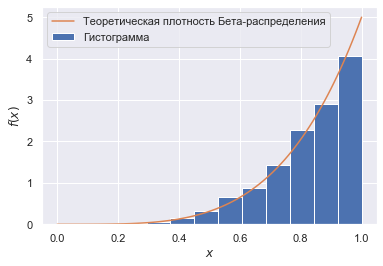

In [139]:
plt.hist(beta(1000), density=True, label="Гистограмма")
X = np.linspace(0, 1, 100)
plt.plot(X, beta_dense(X), label="Теоретическая плотность Бета-распределения")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

Количество выборок равно 1
Среднее равно 0.8333, дисперсия равна 0.0198


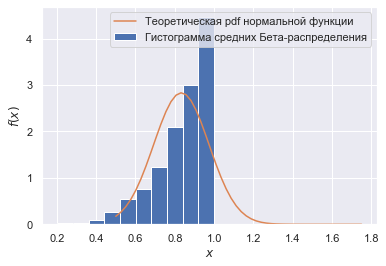

In [164]:
beta_test(1)

Количество выборок равно 3
Среднее равно 0.8333, дисперсия равна 0.0066


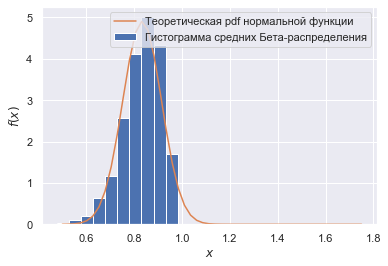

In [165]:
beta_test(3)

Количество выборок равно 5
Среднее равно 0.8333, дисперсия равна 0.0040


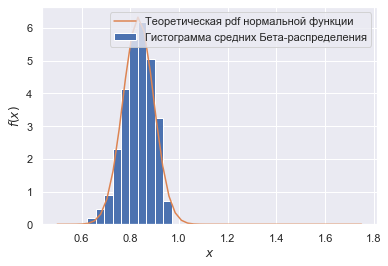

In [166]:
beta_test(5)

Количество выборок равно 10
Среднее равно 0.8333, дисперсия равна 0.0020


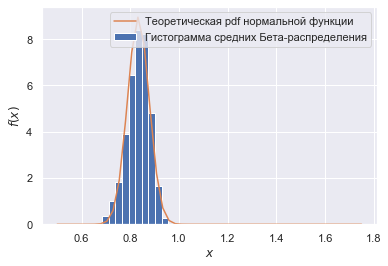

In [167]:
beta_test(10)

Количество выборок равно 15
Среднее равно 0.8333, дисперсия равна 0.0013


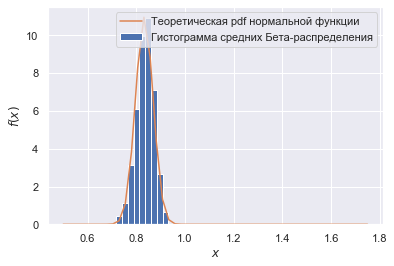

In [169]:
beta_test(15)

Количество выборок равно 30
Среднее равно 0.8333, дисперсия равна 0.0007


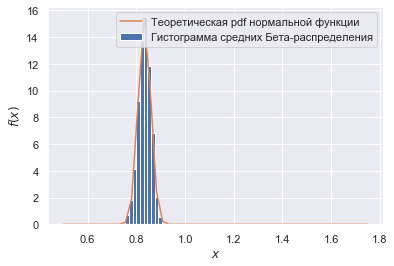

In [170]:
beta_test(30)

Количество выборок равно 50
Среднее равно 0.8333, дисперсия равна 0.0004


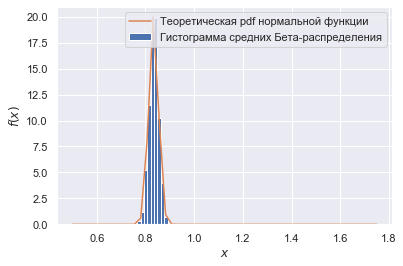

In [171]:
beta_test(50)

Количество выборок равно 100
Среднее равно 0.8333, дисперсия равна 0.0002


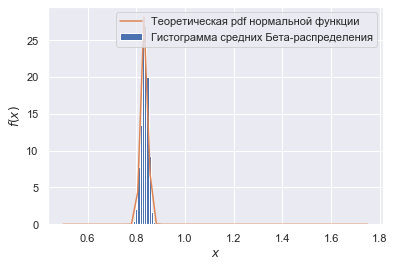

In [172]:
beta_test(100)

Наблюдаем аналогичную ситуацию - при увеличении количества выборок (n) график плотности всё больше напоминает график плотности стандартного распределения.